## Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import textstat

## Data

In [ ]:
feature_columns = [
    "flesch_ease", "grade_level", "gunning_fog", "smog_index",
    "sentence_count", "word_count", "char_count",
    "avg_sentence_length", "difficult_words_ratio"
]

`-` 변수 추가가 필요한 경우

In [5]:
df = pd.read_excel("combined_data_NLP.xlsx")

## 가독성 점수
df["flesch_ease"] = df["answer"].apply(textstat.flesch_reading_ease)
df["grade_level"] = df["answer"].apply(textstat.flesch_kincaid_grade)
df["gunning_fog"] = df["answer"].apply(textstat.gunning_fog)
df["smog_index"] = df["answer"].apply(textstat.smog_index)

* flesch-kincaid reading ease
> 텍스트를 읽기 쉬운 정도를 나타낸 수치로, 낮을수록 읽기 어렵고, 높을수록 읽기 용이하다.
$$206.835 - 1.105 \left( \frac{\text{total words}}{\text{total sentences}} \right) - 84.6 \left( \frac{\text{total syllables}}{\text{total words}} \right)$$
> 텍스트 문장들의 평균 단어 수와 텍스트 단어들의 평균 음절 수에 의존한다.
* flesch-kincaid grade level
> 위 값이 미국의 학년 수준 또는 텍스트를 이해하는데 일반적으로 필요한 교육 연수에 해당되도록 변환하여 제시된 수치로, 높을수록 읽기 어렵다.
$$0.39 \left( \frac{\text{total words}}{\text{total sentences}} \right) + 11.8 \left( \frac{\text{total syllables}}{\text{total words}} \right) - 15.59$$
> 텍스트 문장들의 평균 단어 수와 텍스트 단어들의 평균 음절 수에 의존한다.
* gunning fog index
> 영어 작문의 가독성을 평가하는 수치로, 높을수록 읽기 어렵다.
$$0.4 \left[ \left( \frac{\text{words}}{\text{sentences}} \right) + 100 \left( \frac{\text{complex words}}{\text{words}} \right) \right]$$
> 텍스트 문장들의 평균 단어 수와 텍스트 단어 중 복합 단어(세 음절 이상으로 구성)의 비율에 의존한다.
* smog index
> 텍스트 문장의 수와 복합 단어의 수에 의존, 높을수록 읽기 어렵다. gunnung fog index를 더 정확하고 쉽게 계산할 수 있는 공식
$$1.0430 \sqrt{\text{number of polysyllables} \times \frac{30}{\text{number of sentences}}} + 3.1291$$

In [ ]:
"sentence_count", "word_count", "char_count", "difficult_words_ratio"

In [ ]:
## 기본 통계
df["sentence_count"] = df["answer"].apply(textstat.sentence_count)
df["word_count"] = df["answer"].apply(textstat.lexicon_count)
df["char_count"] = df["answer"].apply(textstat.char_count, ignore_spaces = True)

## 문체/어휘 특징
df["avg_sentence_length"] = df["answer"].apply(textstat.avg_sentence_length)
df["difficult_words_ratio"] = df.apply(lambda row : textstat.difficult_words(row["answer"]) / row["word_count"] if row["word_count"] > 0 else 0, axis = 1)

print("Features added successfully")

output_filename = "combined_data_with_features.csv"
df.to_csv("combined_data_with_features.csv", index = False)

print(f"\nSuccessfully saved the new data to '{output_filename}'.")

Features added successfully


`-` 이미 만들어진 데이터가 존재하는 경우

In [2]:
df = pd.read_csv("combined_data_with_features.csv")

In [3]:
print("\n---Top 5 rows of the DataFrame with new features---")
print(df.head())


---Top 5 rows of the DataFrame with new features---
  model                                         question  attempt  \
0   gpt  Should I get a master's degree? Why or why not?        1   
1   gpt  Should I get a master's degree? Why or why not?        2   
2   gpt  Should I get a master's degree? Why or why not?        3   
3   gpt  Should I get a master's degree? Why or why not?        4   
4   gpt  Should I get a master's degree? Why or why not?        5   

                                              answer  flesch_ease  \
0  Deciding whether to get a master's degree can ...    55.157541   
1  Deciding whether to pursue a master's degree i...    56.505979   
2  Deciding whether or not to pursue a master's d...    54.069211   
3  I've been in a similar boat, pondering if a ma...    48.368267   
4  Deciding whether to pursue a master's degree i...    48.999588   

   grade_level  gunning_fog  smog_index  sentence_count  word_count  \
0    10.373037    13.321395   12.941064       

## 시각화

In [4]:
df.columns

Index(['model', 'question', 'attempt', 'answer', 'flesch_ease', 'grade_level',
       'gunning_fog', 'smog_index', 'sentence_count', 'word_count',
       'char_count', 'avg_sentence_length', 'difficult_words_ratio'],
      dtype='object')

In [5]:
feature_columns = [
    "flesch_ease", "grade_level", "gunning_fog", "smog_index",
    "sentence_count", "word_count", "char_count", "difficult_words_ratio"
]

X = df[feature_columns]
print(X.head())

   flesch_ease  grade_level  gunning_fog  smog_index  sentence_count  \
0    55.157541    10.373037    13.321395   12.941064              20   
1    56.505979    10.083394    13.414980   12.627914              17   
2    54.069211    10.686316    13.368421   12.936687              19   
3    48.368267    11.605697    13.914286   13.023867              14   
4    48.999588    11.492797    14.042353   13.241360              15   

   word_count  char_count  difficult_words_ratio  
0         387        1879               0.204134  
1         322        1563               0.239130  
2         380        1883               0.218421  
3         287        1461               0.233449  
4         306        1565               0.238562  


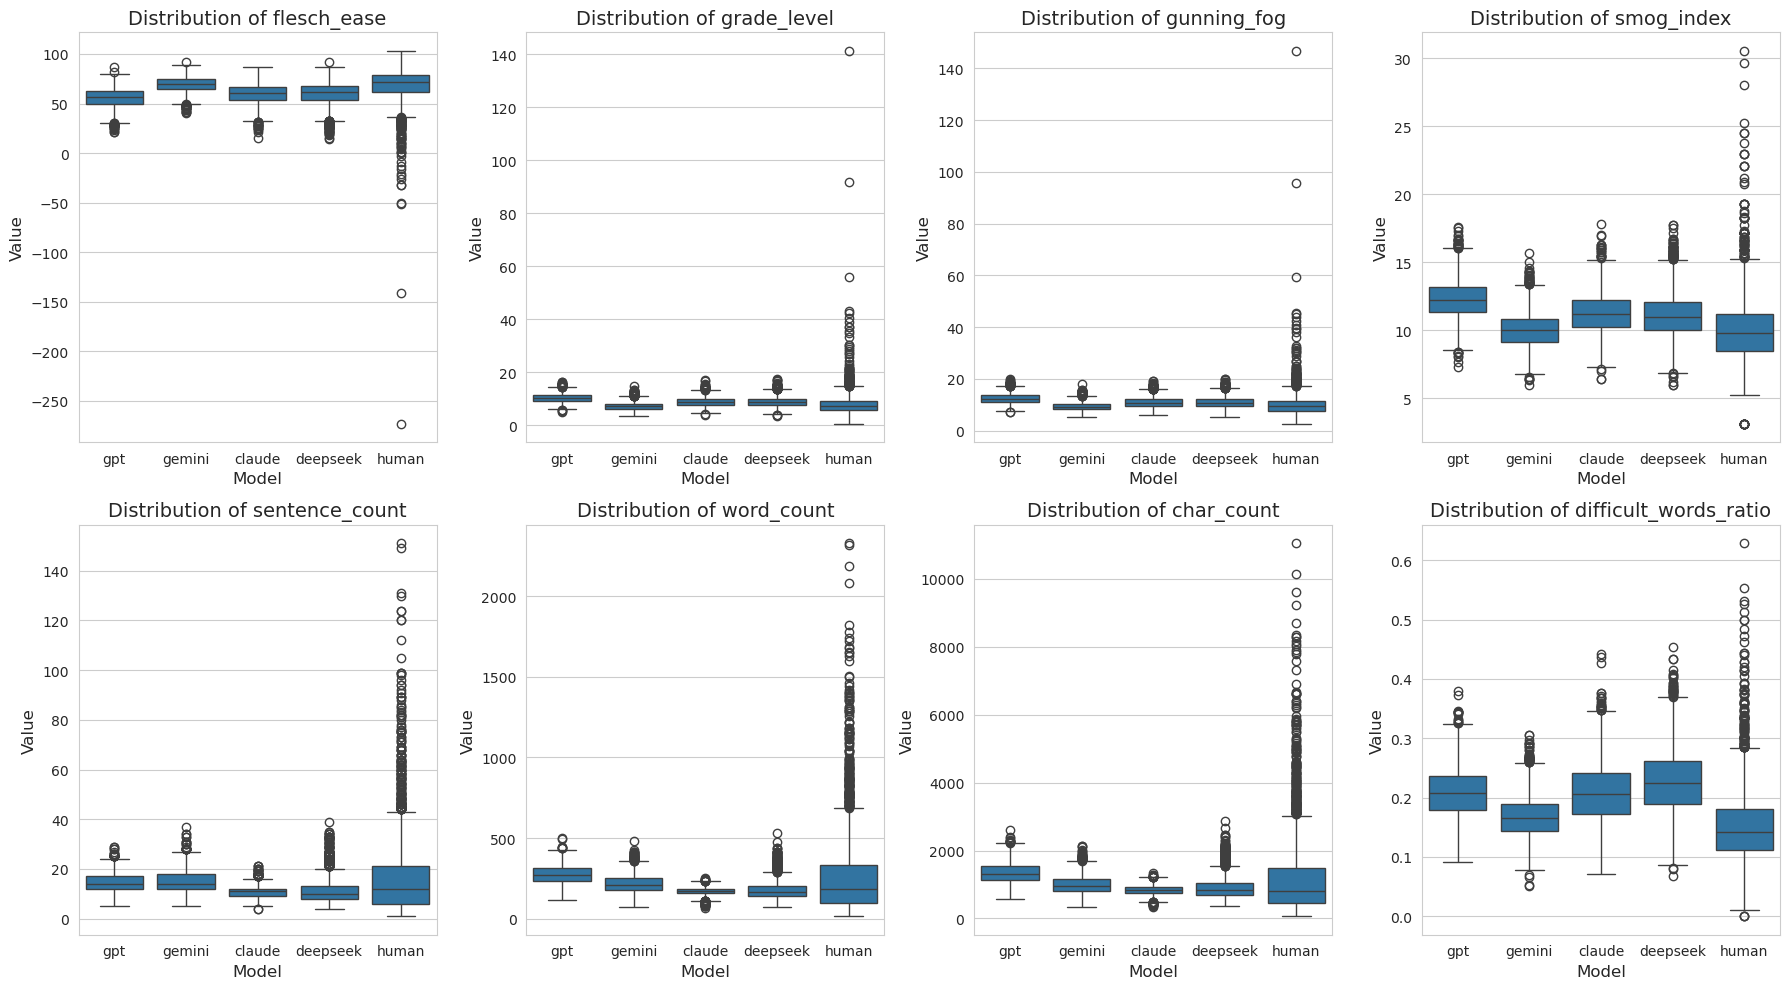

In [8]:
sns.set_style("whitegrid")

num_featrues = len(feature_columns)
ncols = 4
nrows = (num_featrues + ncols - 1) // ncols

fig, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize = (18, nrows * 5))
axes = axes.flatten()

for i, feature in enumerate(feature_columns) :
    sns.boxplot(x = "model", y = feature, data = df, ax = axes[i])
    axes[i].set_title(f"Distribution of {feature}", fontsize = 14)
    axes[i].set_xlabel("Model", fontsize = 12)
    axes[i].set_ylabel("Value", fontsize = 12)

for i in range(num_featrues, len(axes)) :
    fig.delaxes(axes[i])

plt.tight_layout()
# plt.show()
plt.savefig("Fig_sample 1.png", dpi=300, bbox_inches = "tight")

In [12]:
[" ".join(c.split("_")) for c in feature_columns]

['flesch ease',
 'grade level',
 'gunning fog',
 'smog index',
 'sentence count',
 'word count',
 'char count',
 'difficult words ratio']

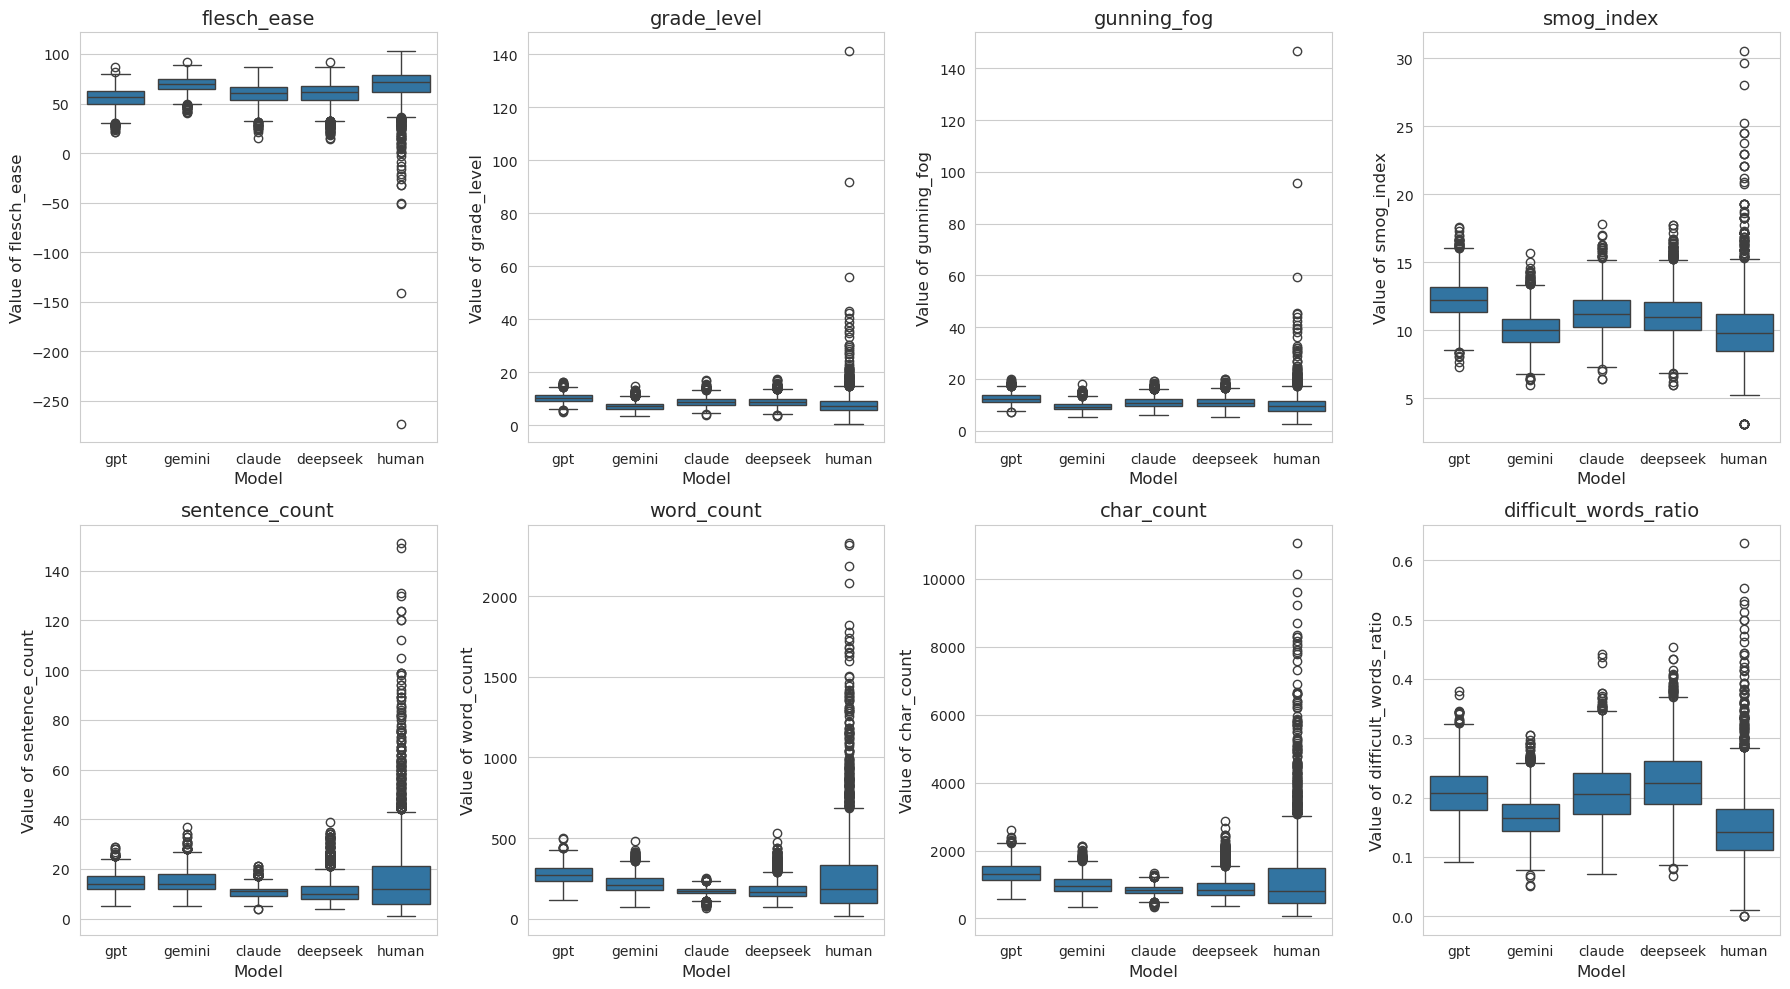

In [9]:
sns.set_style("whitegrid")

num_featrues = len(feature_columns)
ncols = 4
nrows = (num_featrues + ncols - 1) // ncols

fig, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize = (18, nrows * 5))
axes = axes.flatten()

for i, feature in enumerate(feature_columns) :
    sns.boxplot(x = "model", y = feature, data = df, ax = axes[i])
    axes[i].set_title(feature, fontsize = 14)
    axes[i].set_xlabel("Model", fontsize = 12)
    axes[i].set_ylabel(f"Value of {feature}", fontsize = 12)

for i in range(num_featrues, len(axes)) :
    fig.delaxes(axes[i])

plt.tight_layout()
# plt.show()
plt.savefig("Fig_sample 2.png", dpi=300, bbox_inches = "tight")